In [1]:
# Basic data handling
import pandas as pd      # Used to load and manipulate datasets (tables)
import numpy as np       # Helps with numerical operations, arrays, math

# Visualization
import matplotlib.pyplot as plt   # Basic plots like line charts and histograms
import seaborn as sns             # Prettier statistical plots and heatmaps

# Machine Learning
from sklearn.model_selection import train_test_split   # Splits data into train/test
from sklearn.linear_model import LinearRegression       # Linear Regression model
from sklearn.ensemble import RandomForestRegressor     # Random Forest model
from sklearn.preprocessing import StandardScaler        # For scaling features
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Explainability
import shap     # Helps explain model decisions (why a prediction was made)

# Show plots inside notebook
%matplotlib inline


In [10]:
import pandas as pd

path = "C:/Users/shibh/Projects/student_performance_predictor/data/student-mat.csv"

df = pd.read_csv(path)

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [16]:
df.shape


(395, 33)

In [18]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [22]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


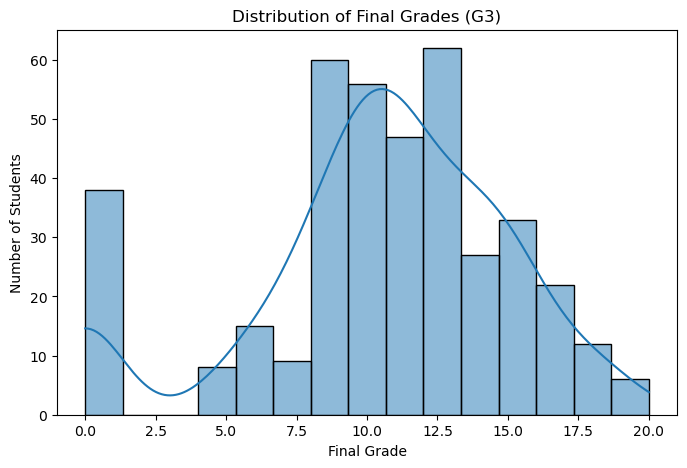

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['G3'], kde=True, bins=15)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()


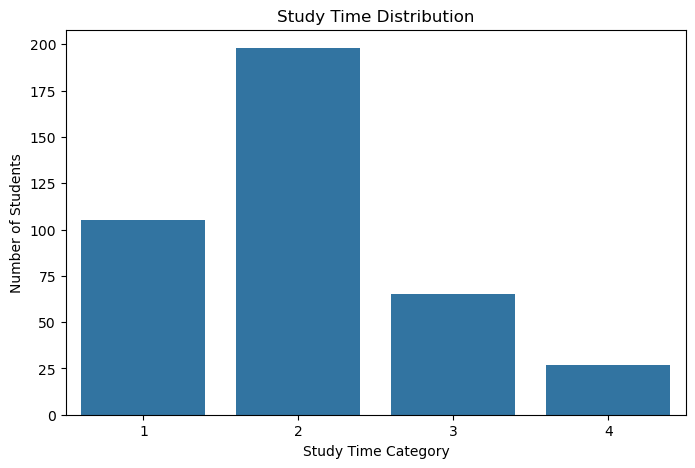

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='studytime', data=df)
plt.title("Study Time Distribution")
plt.xlabel("Study Time Category")
plt.ylabel("Number of Students")
plt.show()


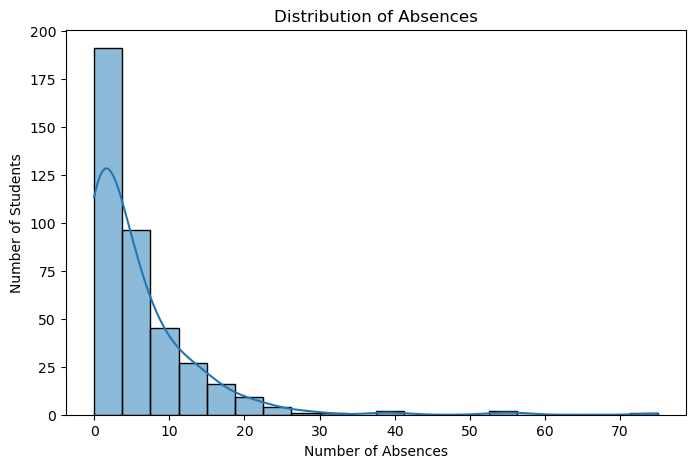

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['absences'], kde=True, bins=20)
plt.title("Distribution of Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Number of Students")
plt.show()


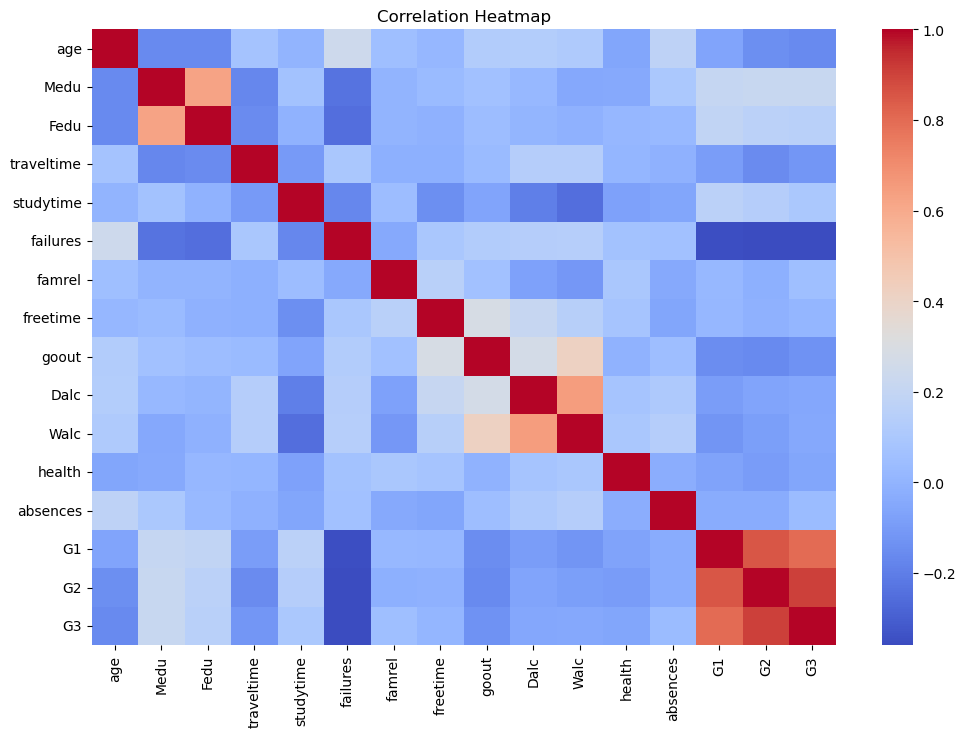

In [30]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [32]:
# Study Efficiency
df['study_efficiency'] = (df['G1'] + df['G2']) / df['studytime']

# Attendance Ratio
df['attendance_ratio'] = 1 / (1 + df['absences'])

# Parental Education Index
df['parent_edu_index'] = (df['Medu'] + df['Fedu']) / 2

# Weekend Alcohol Influence
df['weekend_alcohol'] = df['Walc']

# Weekday Alcohol Influence
df['weekday_alcohol'] = df['Dalc']

# Social Activity Ratio
df['social_activity'] = df['goout']

# Free Time Usefulness
df['free_time_score'] = df['freetime']


In [34]:
df[['study_efficiency', 'attendance_ratio', 'parent_edu_index', 'weekend_alcohol', 'weekday_alcohol', 'social_activity', 'free_time_score']].head()


,study_efficiency,attendance_ratio,parent_edu_index,weekend_alcohol,weekday_alcohol,social_activity,free_time_score
0,5.500000,0.142857,4.0,1,1,4,3
1,5.000000,0.200000,1.0,1,1,3,3
2,7.500000,0.090909,1.0,3,2,2,3
3,9.666667,0.333333,3.0,1,1,2,2
4,8.000000,0.200000,3.0,2,1,2,3


In [36]:
# Target variable
y = df['G3']

# Feature set
feature_cols = [
    'studytime', 'absences', 'Medu', 'Fedu', 'G1', 'G2',
    'study_efficiency', 'attendance_ratio', 'parent_edu_index',
    'weekend_alcohol', 'weekday_alcohol', 'social_activity', 'free_time_score'
]

X = df[feature_cols]


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply to test data
X_test_scaled = scaler.transform(X_test)


In [42]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
lr_predictions = lr_model.predict(X_test_scaled)


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Results:")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R²:", lr_r2)


Linear Regression Results:
MAE: 1.4402494659881586
RMSE: 2.00084315786173
R²: 0.8047615647979101


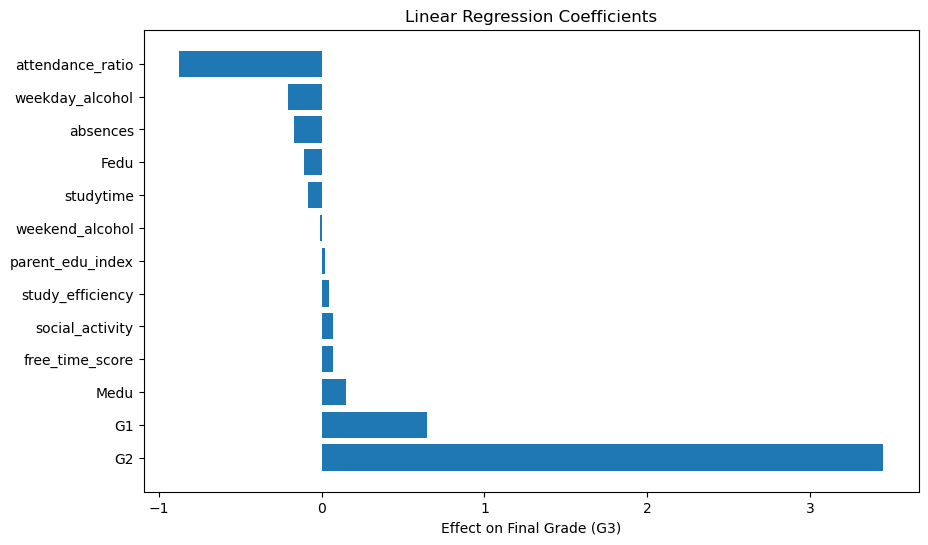

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_
}).sort_values(by='coefficient', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df['feature'], coef_df['coefficient'])
plt.title("Linear Regression Coefficients")
plt.xlabel("Effect on Final Grade (G3)")
plt.show()


In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=343,      # number of trees
    max_depth=None,       # allow trees to grow fully
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,343
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
rf_predictions = rf_model.predict(X_test)


In [54]:
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Results:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R²:", rf_r2)


Random Forest Results:
MAE: 1.118426394065764
RMSE: 1.793449883696508
R²: 0.8431380116669984


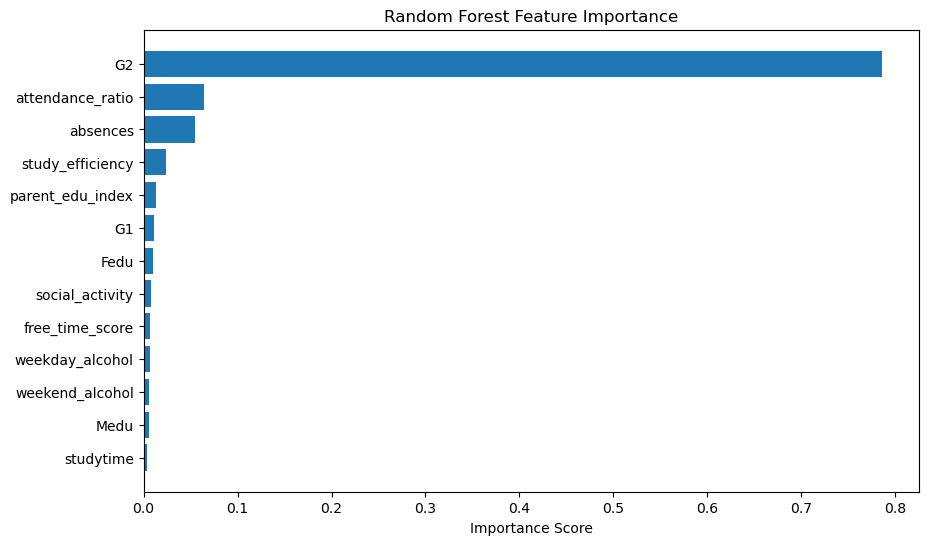

In [56]:
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(np.array(X.columns)[indices], importances[indices])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()


## SHAP

In [59]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)


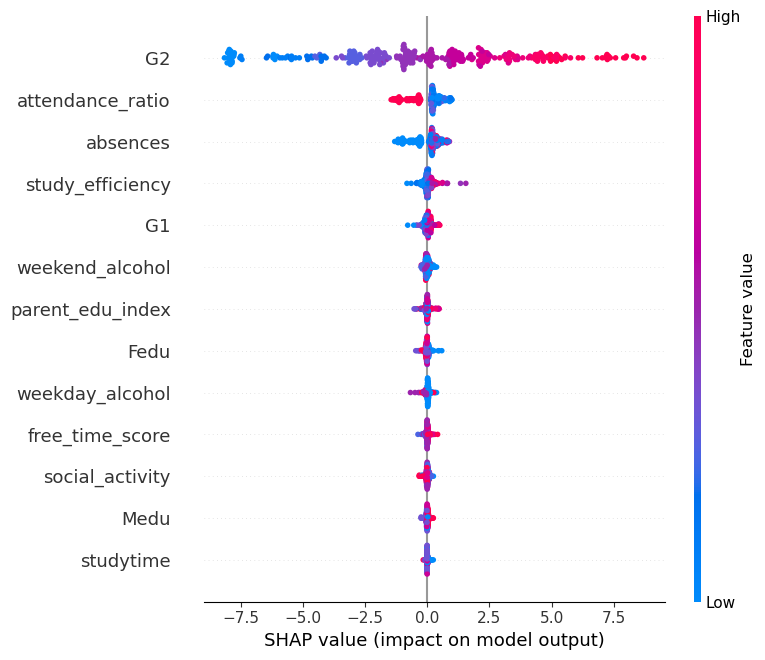

In [61]:
shap.summary_plot(shap_values, X_train)

In [87]:
X_test.shape

(79, 13)

In [89]:
X_test.index

Index([ 78, 371, 248,  55, 390, 223,  42, 234, 316, 116,   9, 209, 323, 393,
       258, 155, 124, 272, 324, 334,  15, 391, 167,   0, 140, 113,  77,  33,
       101,  76, 307, 375, 291, 356,  90, 384, 137,  57,  73,  25,  72, 145,
       329, 141, 158,  93,  46, 304, 108, 196,  39,  56,  30, 377, 386, 132,
       285, 168,  22,  31,  94, 193, 157, 177, 370, 182, 255, 358, 317,   5,
        45,  84, 289, 110, 364,  82, 114,   3,  18],
      dtype='int64')

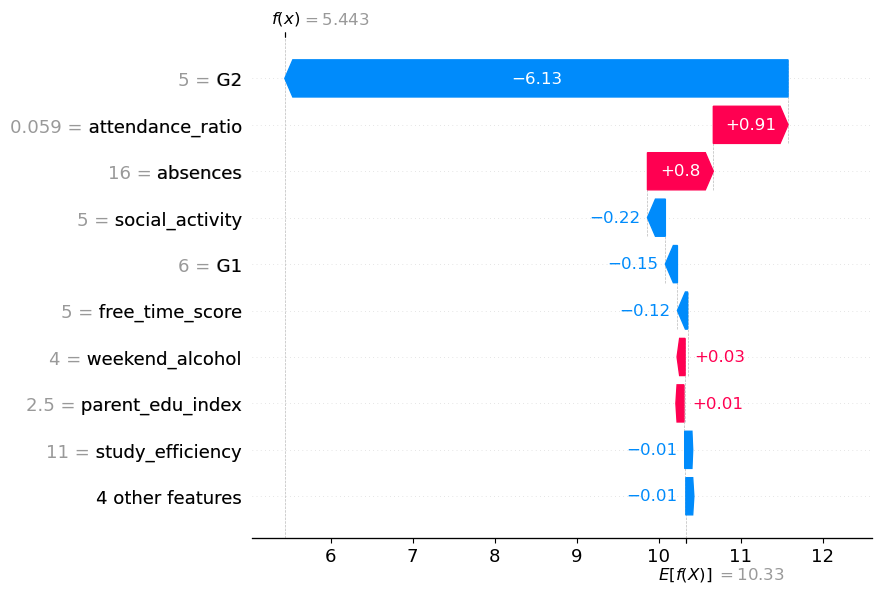

In [91]:
 student = X_test.iloc[78]

shap_value_single = explainer.shap_values(student)

shap.waterfall_plot(shap.Explanation(values=shap_value_single,
                                     base_values=explainer.expected_value,
                                     data=student,
                                     feature_names=X_train.columns))

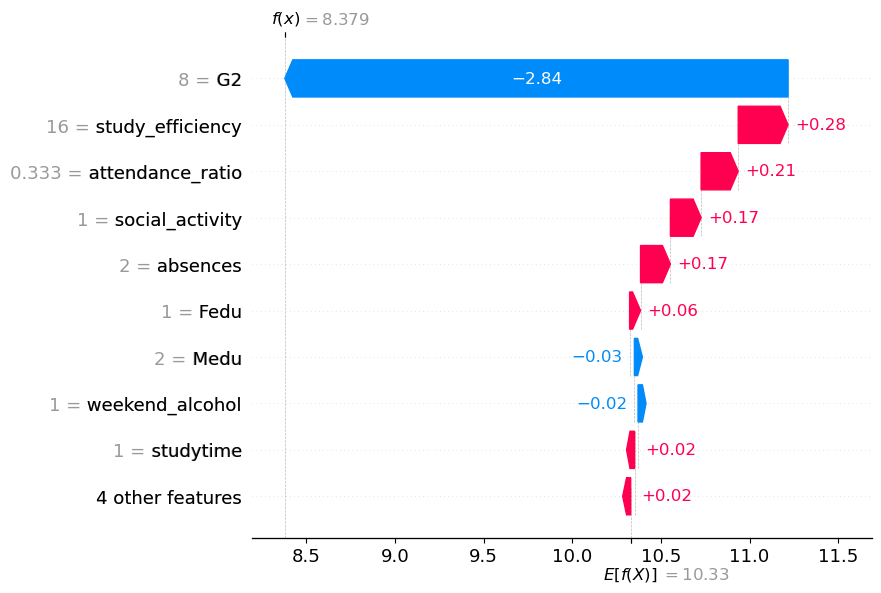

In [93]:
student = X_test.iloc[0]

shap_value_single = explainer.shap_values(student)

shap.waterfall_plot(shap.Explanation(values=shap_value_single,
                                     base_values=explainer.expected_value,
                                     data=student,
                                     feature_names=X_train.columns))

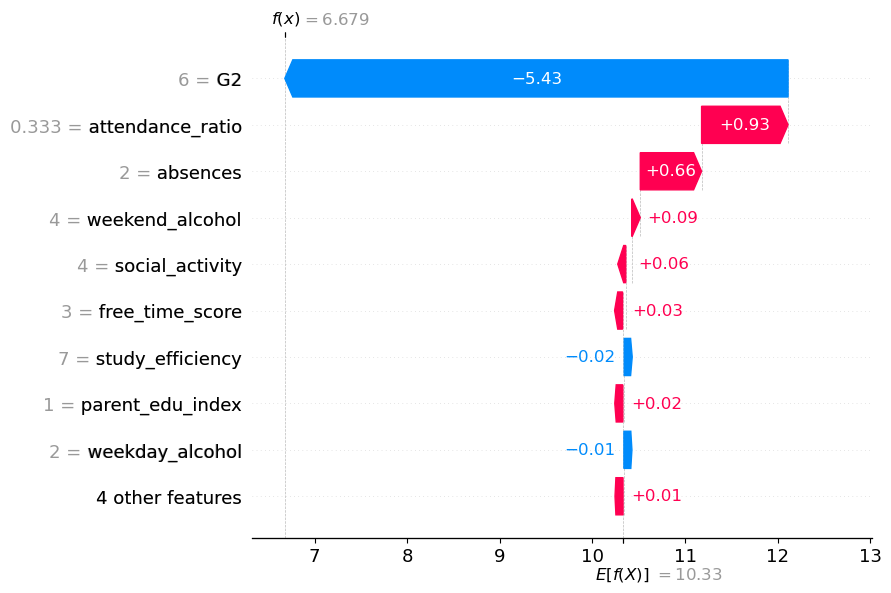

In [95]:
student = X_test.iloc[40]

shap_value_single = explainer.shap_values(student)

shap.waterfall_plot(shap.Explanation(values=shap_value_single,
                                     base_values=explainer.expected_value,
                                     data=student,
                                     feature_names=X_train.columns))

In [97]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [lr_mae, rf_mae],
    'RMSE': [lr_rmse, rf_rmse],
    'R²': [lr_r2, rf_r2]
})

comparison


,Model,MAE,RMSE,R²
0,Linear Regression,1.440249,2.000843,0.804762
1,Random Forest,1.118426,1.793450,0.843138


## What-If Scenario Simulation

In [100]:
def create_features(studytime, absences, G1, G2, Medu=2, Fedu=2,
                    weekend_alcohol=1, weekday_alcohol=1, 
                    social_activity=3, free_time_score=3):
    
    # Recreate a single-row dataframe
    data = pd.DataFrame({
        'studytime': [studytime],
        'absences': [absences],
        'Medu': [Medu],
        'Fedu': [Fedu],
        'G1': [G1],
        'G2': [G2],
        'weekend_alcohol': [weekend_alcohol],
        'weekday_alcohol': [weekday_alcohol],
        'social_activity': [social_activity],
        'free_time_score': [free_time_score]
    })
    
    # Engineered features
    data['study_efficiency'] = (G1 + G2) / studytime
    data['attendance_ratio'] = 1 / (1 + absences)
    data['parent_edu_index'] = (Medu + Fedu) / 2
    
    return data


In [106]:
def predict_grade(studytime, absences, G1, G2,
                  Medu=2, Fedu=2,
                  weekend_alcohol=1, weekday_alcohol=1, 
                  social_activity=3, free_time_score=3):

    # Generate features
    input_df = create_features(
        studytime, absences, G1, G2,
        Medu, Fedu, weekend_alcohol, weekday_alcohol,
        social_activity, free_time_score
    )
    
    input_df = input_df[feature_cols]
    
    # Predict
    prediction = rf_model.predict(input_df)[0]
    return prediction


In [122]:
predict_grade(studytime=2, absences=5, G1=12, G2=13)
#_____BASELINE____________

np.float64(13.472303206997085)

In [110]:
predict_grade(4, 5, 12, 13)
# Increase study time

np.float64(13.53061224489796)

In [116]:
predict_grade(4, 1, 12, 13)
# Reduce absences

np.float64(13.533527696793003)

In [126]:
predict_grade(4, 23, 12, 13)
# Increase absences

np.float64(13.408163265306122)

In [120]:
predict_grade(2, 5, 12, 15)
# Increase G2

np.float64(15.60932944606414)

In [128]:
predict_grade(2, 5, 15, 13)
# Increase G2

np.float64(13.46064139941691)

In [130]:
import pickle

pickle.dump(rf_model, open("rf_model.pkl", "wb"))
